In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import font_manager
from matplotlib.lines import Line2D
import re
import seaborn as sns
import ast

Import data

In [2]:
df_oxide_all = pd.read_csv('data/Final_data/results_oxide_all.csv')
df_sulfide_all = pd.read_csv('data/Final_data/results_sulfide_all.csv')
df_selenide_all = pd.read_csv('data/Final_data/results_selenide_all.csv')
df_telluride_all = pd.read_csv('data/Final_data/results_telluride_all.csv')

Chemical space plot

In [3]:
##Prepare x and y axis tick labels so it sorts by element group
df_elements_by_group=pd.read_csv("data/elements_by_group.csv",header=None)
list_elements_by_group=df_elements_by_group[0].values.tolist()
x_label=[]
y_label=[]
x_newline='\n'
y_space='     '
for i in range(len(list_elements_by_group)):
    if i%2==0:
        x_label.append(list_elements_by_group[i])
        y_label.append(list_elements_by_group[i])
    else:
        x_label.append(x_newline+list_elements_by_group[i])
        y_label.append(list_elements_by_group[i]+y_space)

In [4]:
##Prepare x and y of smact allowed compositions for plotting
def x_y_smact_allowed(df,smact_oxi_thres):
    x = df[df[smact_oxi_thres]==True]['A']
    y = df[df[smact_oxi_thres]==True]['B']
    return x, y

# Low oxidation state threshold
x_smact_allowed_oxide_low, y_smact_allowed_oxide_low = x_y_smact_allowed(df_oxide_all, 'SMACT_low')
x_smact_allowed_sulfide_low, y_smact_allowed_sulfide_low = x_y_smact_allowed(df_sulfide_all, 'SMACT_low')
x_smact_allowed_selenide_low, y_smact_allowed_selenide_low = x_y_smact_allowed(df_selenide_all, 'SMACT_low')
x_smact_allowed_telluride_low, y_smact_allowed_telluride_low = x_y_smact_allowed(df_telluride_all, 'SMACT_low')
# Medium oxidation state threshold
x_smact_allowed_oxide_medium, y_smact_allowed_oxide_medium = x_y_smact_allowed(df_oxide_all, 'SMACT_medium')
x_smact_allowed_sulfide_medium, y_smact_allowed_sulfide_medium = x_y_smact_allowed(df_sulfide_all, 'SMACT_medium')
x_smact_allowed_selenide_medium, y_smact_allowed_selenide_medium = x_y_smact_allowed(df_selenide_all, 'SMACT_medium')
x_smact_allowed_telluride_medium, y_smact_allowed_telluride_medium = x_y_smact_allowed(df_telluride_all, 'SMACT_medium')
# High oxidation state threshold
x_smact_allowed_oxide_high, y_smact_allowed_oxide_high = x_y_smact_allowed(df_oxide_all, 'SMACT_high')
x_smact_allowed_sulfide_high, y_smact_allowed_sulfide_high = x_y_smact_allowed(df_sulfide_all, 'SMACT_high')
x_smact_allowed_selenide_high, y_smact_allowed_selenide_high = x_y_smact_allowed(df_selenide_all, 'SMACT_high')
x_smact_allowed_telluride_high, y_smact_allowed_telluride_high = x_y_smact_allowed(df_telluride_all, 'SMACT_high')

In [5]:
##Prepare x and y of experimentally known compositions for plotting
def x_y_exp_known(df):
    x = df[df['Experimental']==True]['A']
    y = df[df['Experimental']==True]['B']
    return x, y

x_exp_oxide, y_exp_oxide = x_y_exp_known(df_oxide_all)
x_exp_sulfide, y_exp_sulfide = x_y_exp_known(df_sulfide_all)
x_exp_selenide, y_exp_selenide = x_y_exp_known(df_selenide_all)
x_exp_telluride, y_exp_telluride = x_y_exp_known(df_telluride_all)

In [6]:
##Settings for plotting, this will be used in all plots
##Text settings
#Font
font_manager.fontManager.addfont('font/ARIAL.TTF')
plt.rcParams['font.family'] = 'Arial'
#Text size
title_size=14
axes_label_size=12
ticks_label_size=9.5
legend_size=12
txt_size=11
##Figure settings
fig_size=(10, 10)
aspect_ratio='equal'
grid_color = '0.2'

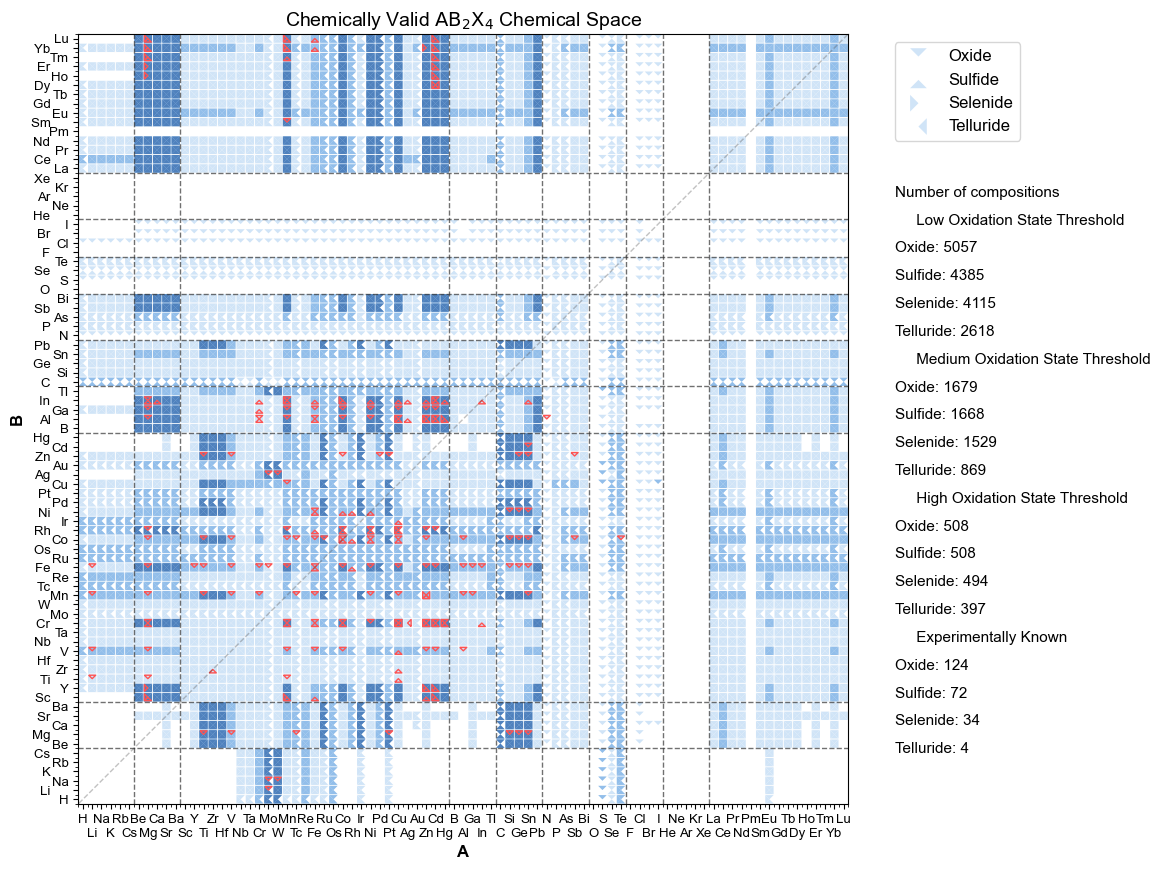

In [9]:
##Plotting Chemically Valid AB2X4 Chemical Space
##This plot was further modified in PowerPoint for better visualization, so the final version may look slightly different

#Marker settings
marker_oxide = [[-1,1],[0,0],[1,1],[-1,1]]#upper
marker_sulfide = [[-1,-1],[0,0],[1,-1],[-1,-1]]#lower
marker_selenide = [[-1,-1],[0,0],[-1,1],[-1,-1]]#left
marker_telluride = [[1,-1],[0,0],[1,1],[1,-1]]#right
#Colors
color_ox_threshold = ["#D0E4F7",'#92BEEA','#4F81BD']#blue

##Plotting
fig,ax=plt.subplots(figsize=fig_size)
ax.set_aspect(aspect_ratio)
ax.set_xlim([-0.5,82.5])
ax.set_ylim([-0.5,82.5])
#Set X and Y ticks to be elements sorted by group
ax.plot(list_elements_by_group,list_elements_by_group,'-',linewidth=0)
ax.set_xticks(list_elements_by_group,x_label,fontsize=ticks_label_size)
ax.set_yticks(list_elements_by_group,y_label,fontsize=ticks_label_size)
ax.set_xlabel('A',fontsize=axes_label_size, fontweight='bold')
ax.set_ylabel('B',fontsize=axes_label_size, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
#Set grid lines to separate element groups
custom_grid = [5.5, 10.5, 39.5, 44.5, 49.5, 54.5, 58.5, 62.5, 67.5]
for x in custom_grid:
    ax.axvline(x=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
    ax.axhline(y=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
#Diagonal line
x_diagonal=np.linspace(-10,100,10)
y_diagonal=x_diagonal
ax.plot(x_diagonal,y_diagonal,'--',color=grid_color,linewidth=1,alpha=0.3)
#Low oxidation state threshold
ax.scatter(x_smact_allowed_oxide_low,y_smact_allowed_oxide_low,marker=marker_oxide,edgecolor='None',c=color_ox_threshold[0],label='Oxide')
ax.scatter(x_smact_allowed_sulfide_low,y_smact_allowed_sulfide_low,marker=marker_sulfide,edgecolor='None',c=color_ox_threshold[0],label='Sulfide')
ax.scatter(x_smact_allowed_selenide_low,y_smact_allowed_selenide_low,marker=marker_selenide,edgecolor='None',c=color_ox_threshold[0],label='Selenide')
ax.scatter(x_smact_allowed_telluride_low,y_smact_allowed_telluride_low,marker=marker_telluride,edgecolor='None',c=color_ox_threshold[0],label='Telluride')
#Medium oxidation state threshold
ax.scatter(x_smact_allowed_oxide_medium,y_smact_allowed_oxide_medium,marker=marker_oxide,edgecolor='None',c=color_ox_threshold[1])
ax.scatter(x_smact_allowed_sulfide_medium,y_smact_allowed_sulfide_medium,marker=marker_sulfide,edgecolor='None',c=color_ox_threshold[1])
ax.scatter(x_smact_allowed_selenide_medium,y_smact_allowed_selenide_medium,marker=marker_selenide,edgecolor='None',c=color_ox_threshold[1])
ax.scatter(x_smact_allowed_telluride_medium,y_smact_allowed_telluride_medium,marker=marker_telluride,edgecolor='None',c=color_ox_threshold[1])
#High oxidation state threshold
ax.scatter(x_smact_allowed_oxide_high,y_smact_allowed_oxide_high,marker=marker_oxide,edgecolor='None',c=color_ox_threshold[2])
ax.scatter(x_smact_allowed_sulfide_high,y_smact_allowed_sulfide_high,marker=marker_sulfide,edgecolor='None',c=color_ox_threshold[2])
ax.scatter(x_smact_allowed_selenide_high,y_smact_allowed_selenide_high,marker=marker_selenide,edgecolor='None',c=color_ox_threshold[2])
ax.scatter(x_smact_allowed_telluride_high,y_smact_allowed_telluride_high,marker=marker_telluride,edgecolor='None',c=color_ox_threshold[2])
#Experimentally known
ax.scatter(x_exp_oxide,y_exp_oxide,marker=marker_oxide,facecolor='None',s=25, linewidths=1, edgecolor="#FE5353")
ax.scatter(x_exp_sulfide,y_exp_sulfide,marker=marker_sulfide,facecolor='None',s=25, linewidths=1,edgecolor="#FE5353")
ax.scatter(x_exp_selenide,y_exp_selenide,marker=marker_selenide,facecolor='None',s=25, linewidths=1,edgecolor="#FE5353")
ax.scatter(x_exp_telluride,y_exp_telluride,marker=marker_telluride,facecolor='None',s=25, linewidths=1,edgecolor="#FE5353")
#Plot title
ax.set_title(r'Chemically Valid $\mathrm{AB_2X_4}$ Chemical Space',fontsize=title_size)
#Plot legend
ax.legend(loc='upper left',bbox_to_anchor=(1.05,1),fontsize=legend_size,markerscale=2)
#Text box with number of compositions
txt_pos_x=87.5
txt_pos_y=65
ax.text(txt_pos_x, txt_pos_y, f'Number of compositions', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-3, f'     Low Oxidation State Threshold', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-6, f'Oxide: {len(df_oxide_all[df_oxide_all["SMACT_low"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-9, f'Sulfide: {len(df_sulfide_all[df_sulfide_all["SMACT_low"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-12, f'Selenide: {len(df_selenide_all[df_selenide_all["SMACT_low"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-15, f'Telluride: {len(df_telluride_all[df_telluride_all["SMACT_low"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-18, f'     Medium Oxidation State Threshold', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-21, f'Oxide: {len(df_oxide_all[df_oxide_all["SMACT_medium"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-24, f'Sulfide: {len(df_sulfide_all[df_sulfide_all["SMACT_medium"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-27, f'Selenide: {len(df_selenide_all[df_selenide_all["SMACT_medium"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-30, f'Telluride: {len(df_telluride_all[df_telluride_all["SMACT_medium"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-33, f'     High Oxidation State Threshold', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-36, f'Oxide: {len(df_oxide_all[df_oxide_all["SMACT_high"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-39, f'Sulfide: {len(df_sulfide_all[df_sulfide_all["SMACT_high"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-42, f'Selenide: {len(df_selenide_all[df_selenide_all["SMACT_high"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-45, f'Telluride: {len(df_telluride_all[df_telluride_all["SMACT_high"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-48, r'     Experimentally Known', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-51, f'Oxide: {len(df_oxide_all[df_oxide_all["Experimental"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-54, f'Sulfide: {len(df_sulfide_all[df_sulfide_all["Experimental"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-57, f'Selenide: {len(df_selenide_all[df_selenide_all["Experimental"]==True])}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-60, f'Telluride: {len(df_telluride_all[df_telluride_all["Experimental"]==True])}', fontsize=txt_size)

fig.savefig('plots/1_chemically_valid_chemical_space.pdf', format='pdf', bbox_inches='tight')

Ehull plot

In [10]:
##Prepare x and y for plotting, only compositions that pass ehull criteria (<=0.2 eV) will be plotted here
def get_x_y_ehull(df,smact_oxi_thres):
    x = df[(df[smact_oxi_thres]==True) & (df['Ehull_min']<=0.20)]['A']
    y = df[(df[smact_oxi_thres]==True) & (df['Ehull_min']<=0.20)]['B']
    ehull = df[(df[smact_oxi_thres]==True) & (df['Ehull_min']<=0.20)]['Ehull_min']
    return x, y, ehull
# Low oxidation state threshold
x_ehull_oxide_low, y_ehull_oxide_low, ehull_oxide_low = get_x_y_ehull(df_oxide_all, 'SMACT_low')
x_ehull_sulfide_low, y_ehull_sulfide_low, ehull_sulfide_low = get_x_y_ehull(df_sulfide_all, 'SMACT_low')
x_ehull_selenide_low, y_ehull_selenide_low, ehull_selenide_low = get_x_y_ehull(df_selenide_all, 'SMACT_low')
x_ehull_telluride_low, y_ehull_telluride_low, ehull_telluride_low = get_x_y_ehull(df_telluride_all, 'SMACT_low')

# Medium oxidation state threshold
x_ehull_oxide_medium, y_ehull_oxide_medium, ehull_oxide_medium = get_x_y_ehull(df_oxide_all, 'SMACT_medium')
x_ehull_sulfide_medium, y_ehull_sulfide_medium, ehull_sulfide_medium = get_x_y_ehull(df_sulfide_all, 'SMACT_medium')
x_ehull_selenide_medium, y_ehull_selenide_medium, ehull_selenide_medium = get_x_y_ehull(df_selenide_all, 'SMACT_medium')
x_ehull_telluride_medium, y_ehull_telluride_medium, ehull_telluride_medium = get_x_y_ehull(df_telluride_all, 'SMACT_medium')

# High oxidation state threshold
x_ehull_oxide_high, y_ehull_oxide_high, ehull_oxide_high = get_x_y_ehull(df_oxide_all, 'SMACT_high')
x_ehull_sulfide_high, y_ehull_sulfide_high, ehull_sulfide_high = get_x_y_ehull(df_sulfide_all, 'SMACT_high')
x_ehull_selenide_high, y_ehull_selenide_high, ehull_selenide_high = get_x_y_ehull(df_selenide_all, 'SMACT_high')
x_ehull_telluride_high, y_ehull_telluride_high, ehull_telluride_high = get_x_y_ehull(df_telluride_all, 'SMACT_high')

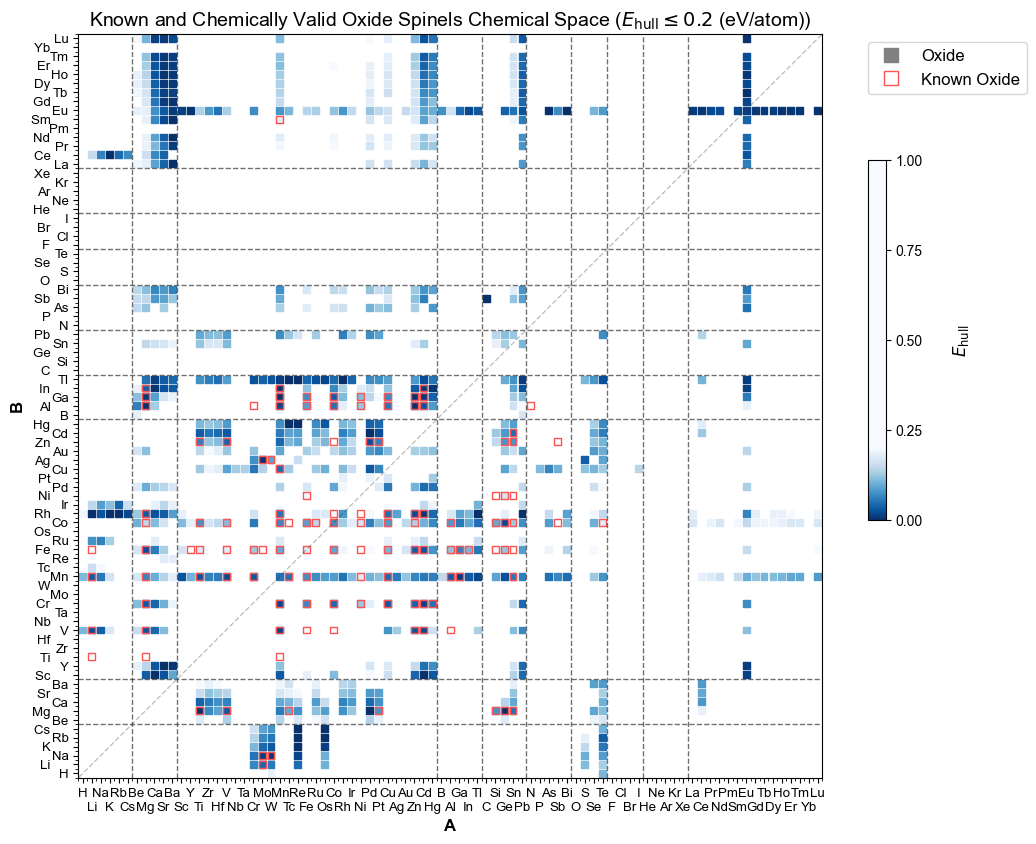

In [ ]:
##SMACT valid Oxide with known data with super score
fig_size = (12,12)
##Setting x, y, and SuperScore data for plotting, just change the x and y data to plot different sets
x_data = x_ehull_oxide_medium
y_data = y_ehull_oxide_medium
score_data = ehull_oxide_medium

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

##Setting colormap
colormap = sns.color_palette("Blues", as_cmap=True).reversed() ##In this case, the lower the ehull, the darker the blue color. So the darker means more likely to be stable

##Chemical space from SMACT with low oxidation state threshold
x_diagonal=np.linspace(-10,100,10)
y_diagonal=x_diagonal
fig,ax=plt.subplots(figsize=fig_size)
ax.set_aspect(aspect_ratio)
ax.set_xlim([-0.5,82.5])
ax.set_ylim([-0.5,82.5])
ax.plot(list_elements_by_group,list_elements_by_group,'-',linewidth=0)
ax.plot(x_diagonal,y_diagonal,'--',color=grid_color,linewidth=1,alpha=0.3)

img = ax.scatter(x_data,y_data,marker='s',s=25,c=score_data,cmap=colormap)
ax.scatter(x_exp_oxide,y_exp_oxide,marker='s',s=25,facecolor='None', edgecolor="#FE5353")

ax.set_title(f'Known and Chemically Valid {spinel_type} Spinels Chemical Space ' + r'($E_\mathrm{hull} \leq 0.2$ (eV/atom))', fontsize=title_size)
ax.set_xticks(list_elements_by_group,x_label,fontsize=ticks_label_size)
ax.set_yticks(list_elements_by_group,y_label,fontsize=ticks_label_size)
ax.set_xlabel('A',fontsize=axes_label_size, fontweight='bold')
ax.set_ylabel('B',fontsize=axes_label_size, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
custom_grid = [5.5, 10.5, 39.5, 44.5, 49.5, 54.5, 58.5, 62.5, 67.5]
for x in custom_grid:
    ax.axvline(x=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
    ax.axhline(y=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
txt_pos_x=87.5
txt_pos_y=65

legend_elements = [
    Line2D([0], [0], marker='s', color='grey', markeredgecolor=None, label='Oxide', markersize=5, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markeredgecolor="#FE5353", label='Known Oxide', markersize=5, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05,1),fontsize=legend_size,markerscale=2)

##Color bar was further edited plot for better visualization, the final version may look slightly different
cbar = fig.colorbar(img, ax=ax, orientation='vertical',boundaries=np.linspace(0, 1,1000), ticks=np.linspace(0, 1, 5))
cbar.ax.set_position([0.783, 0.4, 1, 0.3])
cbar.set_label(r'$E_\mathrm{hull}$', fontsize=axes_label_size, labelpad=20)

fig.savefig(f'plots/2_ehull_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')

CLscore plot

In [13]:
##Prepare x and y for plotting, only compositions that pass clscore criteria (>=0.5) will be plotted here
def get_x_y_clscore(df,smact_oxi_thres):
    x = df[(df[smact_oxi_thres]==True) & (df['SuperScore']>=0.5)]['A']
    y = df[(df[smact_oxi_thres]==True) & (df['SuperScore']>=0.5)]['B']
    clscore = df[(df[smact_oxi_thres]==True) & (df['SuperScore']>=0.5)]['SuperScore']
    return x, y, clscore

# Low oxidation state threshold
x_clscore_oxide_low, y_clscore_oxide_low, clscore_oxide_low = get_x_y_clscore(df_oxide_all, 'SMACT_low')
x_clscore_sulfide_low, y_clscore_sulfide_low, clscore_sulfide_low = get_x_y_clscore(df_sulfide_all, 'SMACT_low')
x_clscore_selenide_low, y_clscore_selenide_low, clscore_selenide_low = get_x_y_clscore(df_selenide_all, 'SMACT_low')
x_clscore_telluride_low, y_clscore_telluride_low, clscore_telluride_low = get_x_y_clscore(df_telluride_all, 'SMACT_low')

# Medium oxidation state threshold
x_clscore_oxide_medium, y_clscore_oxide_medium, clscore_oxide_medium = get_x_y_clscore(df_oxide_all, 'SMACT_medium')
x_clscore_sulfide_medium, y_clscore_sulfide_medium, clscore_sulfide_medium = get_x_y_clscore(df_sulfide_all, 'SMACT_medium')
x_clscore_selenide_medium, y_clscore_selenide_medium, clscore_selenide_medium = get_x_y_clscore(df_selenide_all, 'SMACT_medium')
x_clscore_telluride_medium, y_clscore_telluride_medium, clscore_telluride_medium = get_x_y_clscore(df_telluride_all, 'SMACT_medium')

# High oxidation state threshold
x_clscore_oxide_high, y_clscore_oxide_high, clscore_oxide_high = get_x_y_clscore(df_oxide_all, 'SMACT_high')
x_clscore_sulfide_high, y_clscore_sulfide_high, clscore_sulfide_high = get_x_y_clscore(df_sulfide_all, 'SMACT_high')
x_clscore_selenide_high, y_clscore_selenide_high, clscore_selenide_high = get_x_y_clscore(df_selenide_all, 'SMACT_high')
x_clscore_telluride_high, y_clscore_telluride_high, clscore_telluride_high = get_x_y_clscore(df_telluride_all, 'SMACT_high')

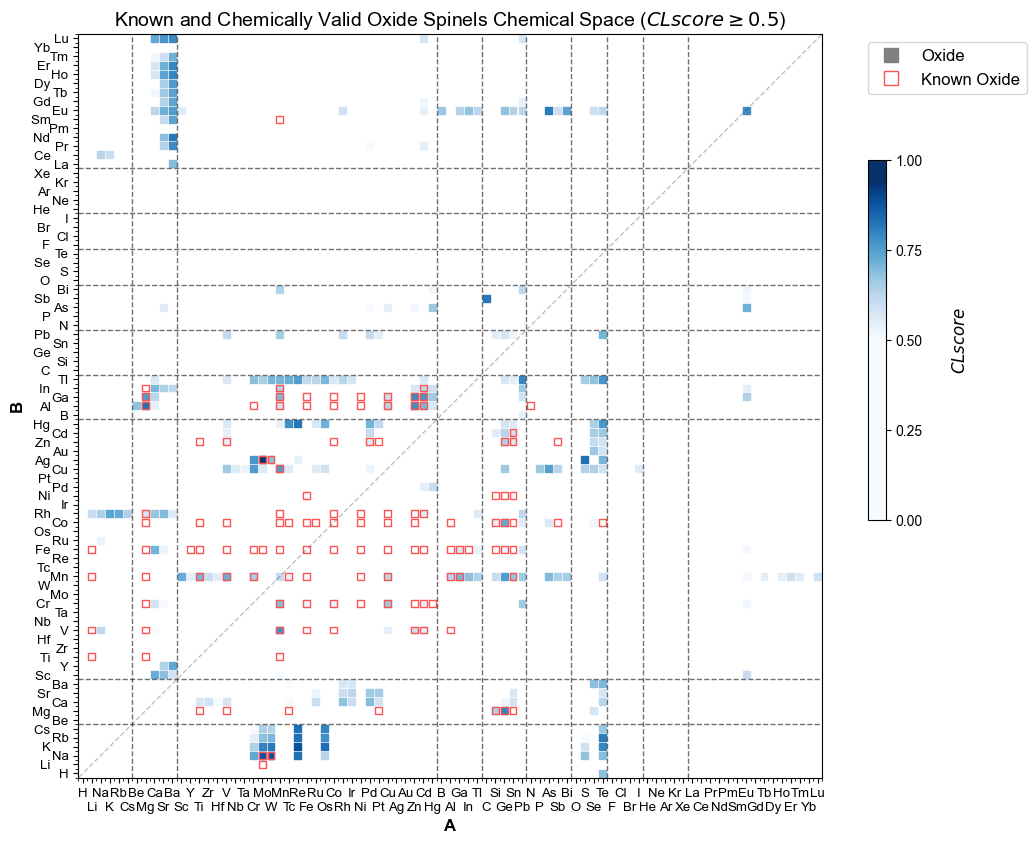

In [ ]:
##SMACT valid Oxide with known data with super score
fig_size = (12,12)
##Setting x, y, and SuperScore data for plotting, just change the x and y data to plot different sets
x_data = x_clscore_oxide_medium
y_data = y_clscore_oxide_medium
score_data = clscore_oxide_medium

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

##Setting colormap
colormap = sns.color_palette("Blues", as_cmap=True) ##In this case, the higher the clscore, the darker the blue color. So the darker means more likely to be stable

##Chemical space from SMACT with low oxidation state threshold
x_diagonal=np.linspace(-10,100,10)
y_diagonal=x_diagonal
fig,ax=plt.subplots(figsize=fig_size)
ax.set_aspect(aspect_ratio)
ax.set_xlim([-0.5,82.5])
ax.set_ylim([-0.5,82.5])
ax.plot(list_elements_by_group,list_elements_by_group,'-',linewidth=0)
ax.plot(x_diagonal,y_diagonal,'--',color=grid_color,linewidth=1,alpha=0.3)

img = ax.scatter(x_data,y_data,marker='s',s=25,c=score_data,cmap=colormap)
ax.scatter(x_exp_oxide,y_exp_oxide,marker='s',s=25,facecolor='None', edgecolor="#FE5353")

ax.set_title(f'Known and Chemically Valid {spinel_type} Spinels Chemical Space ' + r'($CLscore \geq 0.5$)', fontsize=title_size)
ax.set_xticks(list_elements_by_group,x_label,fontsize=ticks_label_size)
ax.set_yticks(list_elements_by_group,y_label,fontsize=ticks_label_size)
ax.set_xlabel('A',fontsize=axes_label_size, fontweight='bold')
ax.set_ylabel('B',fontsize=axes_label_size, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
custom_grid = [5.5, 10.5, 39.5, 44.5, 49.5, 54.5, 58.5, 62.5, 67.5]
for x in custom_grid:
    ax.axvline(x=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
    ax.axhline(y=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
txt_pos_x=87.5
txt_pos_y=65

legend_elements = [
    Line2D([0], [0], marker='s', color='grey', markeredgecolor=None, label='Oxide', markersize=5, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markeredgecolor="#FE5353", label='Known Oxide', markersize=5, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05,1),fontsize=legend_size,markerscale=2)

##Color bar was further edited for better visualization, the final version may look slightly different
cbar = fig.colorbar(img, ax=ax, orientation='vertical',boundaries=np.linspace(0, 1,1000), ticks=np.linspace(0, 1, 5))
cbar.ax.set_position([0.783, 0.4, 1, 0.3])
cbar.set_label(r'$CLscore$', fontsize=axes_label_size, labelpad=20)

fig.savefig(f'plots/3_clscore_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')

Super score plot

In [16]:
##Prepare x and y for plotting, only compositions that pass super score screening will be plotted here
def get_x_y_super_score(df,smact_oxi_thres):
    x = df[(df[smact_oxi_thres]==True) & (df['SuperScore'].notna())]['A']
    y = df[(df[smact_oxi_thres]==True) & (df['SuperScore'].notna())]['B']
    super_score = df[(df[smact_oxi_thres]==True) & (df['SuperScore'].notna())]['SuperScore']
    return x, y, super_score

# Low oxidation state threshold
x_super_score_oxide_low, y_super_score_oxide_low, super_score_oxide_low = get_x_y_super_score(df_oxide_all, 'SMACT_low')
x_super_score_sulfide_low, y_super_score_sulfide_low, super_score_sulfide_low = get_x_y_super_score(df_sulfide_all, 'SMACT_low')
x_super_score_selenide_low, y_super_score_selenide_low, super_score_selenide_low = get_x_y_super_score(df_selenide_all, 'SMACT_low')
x_super_score_telluride_low, y_super_score_telluride_low, super_score_telluride_low = get_x_y_super_score(df_telluride_all, 'SMACT_low')
# Medium oxidation state threshold
x_super_score_oxide_medium, y_super_score_oxide_medium, super_score_oxide_medium = get_x_y_super_score(df_oxide_all, 'SMACT_medium')
x_super_score_sulfide_medium, y_super_score_sulfide_medium, super_score_sulfide_medium = get_x_y_super_score(df_sulfide_all, 'SMACT_medium')
x_super_score_selenide_medium, y_super_score_selenide_medium, super_score_selenide_medium = get_x_y_super_score(df_selenide_all, 'SMACT_medium')
x_super_score_telluride_medium, y_super_score_telluride_medium, super_score_telluride_medium = get_x_y_super_score(df_telluride_all, 'SMACT_medium')
# High oxidation state threshold
x_super_score_oxide_high, y_super_score_oxide_high, super_score_oxide_high = get_x_y_super_score(df_oxide_all, 'SMACT_high')
x_super_score_sulfide_high, y_super_score_sulfide_high, super_score_sulfide_high = get_x_y_super_score(df_sulfide_all, 'SMACT_high')
x_super_score_selenide_high, y_super_score_selenide_high, super_score_selenide_high = get_x_y_super_score(df_selenide_all, 'SMACT_high')
x_super_score_telluride_high, y_super_score_telluride_high, super_score_telluride_high = get_x_y_super_score(df_telluride_all, 'SMACT_high')

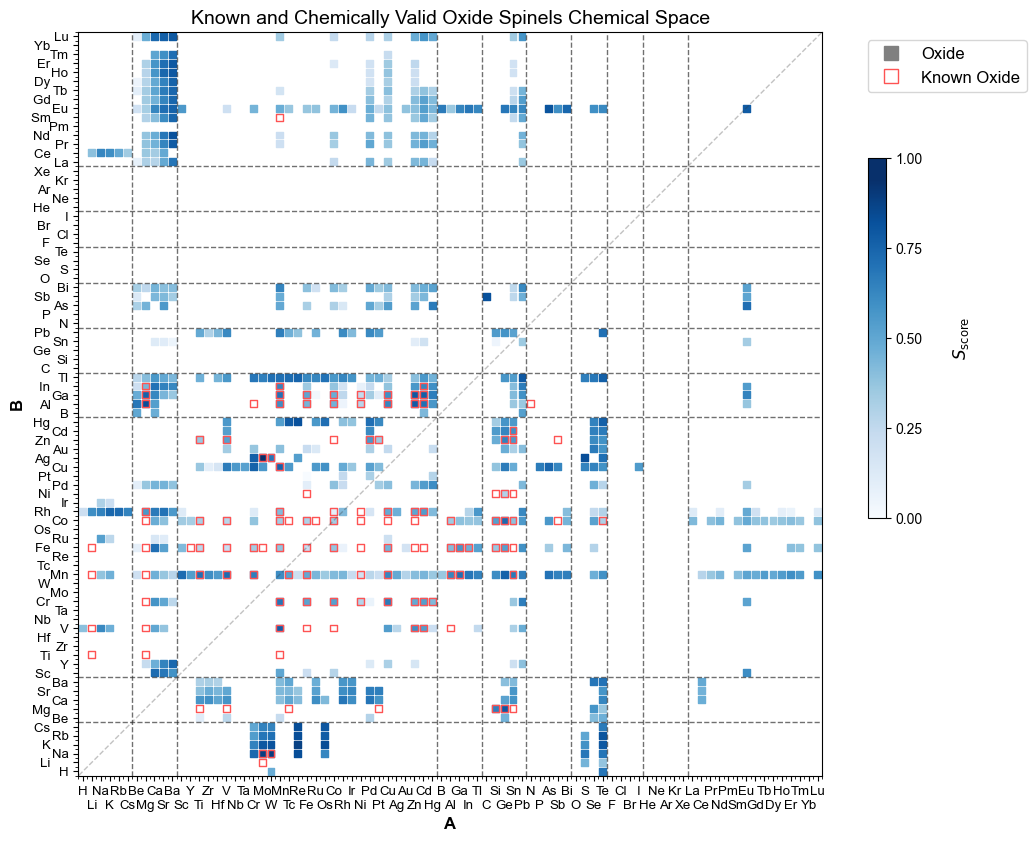

In [18]:
##SMACT valid Oxide with known data with super score
fig_size = (12,12)
##Setting x, y, and SuperScore data for plotting, just change the x and y data to plot different sets
x_data = x_super_score_oxide_medium
y_data = y_super_score_oxide_medium
score_data = super_score_oxide_medium

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

##Setting colormap
colormap = sns.color_palette("Blues", as_cmap=True)

##Chemical space from SMACT with low oxidation state threshold
x_diagonal=np.linspace(-10,100,10)
y_diagonal=x_diagonal
fig,ax=plt.subplots(figsize=fig_size)
ax.set_aspect(aspect_ratio)
ax.set_xlim([-0.5,82.5])
ax.set_ylim([-0.5,82.5])
ax.plot(list_elements_by_group,list_elements_by_group,'-',linewidth=0)
ax.plot(x_diagonal,y_diagonal,'--',color=grid_color,linewidth=1,alpha=0.3)

img = ax.scatter(x_data,y_data,marker='s',s=25,c=score_data,cmap=colormap)
ax.scatter(x_exp_oxide,y_exp_oxide,marker='s',s=25,facecolor='None', edgecolor="#FE5353")

ax.set_title(f'Known and Chemically Valid {spinel_type} Spinels Chemical Space',fontsize=title_size)
ax.set_xticks(list_elements_by_group,x_label,fontsize=ticks_label_size)
ax.set_yticks(list_elements_by_group,y_label,fontsize=ticks_label_size)
ax.set_xlabel('A',fontsize=axes_label_size, fontweight='bold')
ax.set_ylabel('B',fontsize=axes_label_size, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
custom_grid = [5.5, 10.5, 39.5, 44.5, 49.5, 54.5, 58.5, 62.5, 67.5]
for x in custom_grid:
    ax.axvline(x=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
    ax.axhline(y=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
txt_pos_x=87.5
txt_pos_y=65

legend_elements = [
    Line2D([0], [0], marker='s', color='grey', markeredgecolor=None, label='Oxide', markersize=5, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markeredgecolor="#FE5353", label='Known Oxide', markersize=5, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05,1),fontsize=legend_size,markerscale=2)

##Color bar was further edited for better visualization, the final version may look slightly different
cbar = fig.colorbar(img, ax=ax, orientation='vertical',boundaries=np.linspace(0, 1,1000), ticks=np.linspace(0, 1, 5))
cbar.ax.set_position([0.783, 0.4, 1, 0.3])
cbar.set_label(r'$S_\mathrm{score}$', fontsize=axes_label_size, labelpad=20)

fig.savefig(f'plots/4_super_score_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')

Inversion parameter plot

In [19]:
##Prepare x and y for plotting, only compositions that super score screening will be plotted here, also A3X4 will not be plotted here since we cannot calculate the inversion parameter for A3X4
def get_x_y_inv_param(df,smact_oxi_thres):
    x = df[(df[smact_oxi_thres]==True) & (df['inversion_parameter'].notna())]['A']
    y = df[(df[smact_oxi_thres]==True) & (df['inversion_parameter'].notna())]['B']
    inv_score = df[(df[smact_oxi_thres]==True) & (df['inversion_parameter'].notna())]['inversion_parameter']
    return x, y, inv_score

# Low oxidation state threshold
x_inv_oxide_low, y_inv_oxide_low, inv_param_data_oxide_low = get_x_y_inv_param(df_oxide_all, 'SMACT_low')
x_inv_sulfide_low, y_inv_sulfide_low, inv_param_data_sulfide_low = get_x_y_inv_param(df_sulfide_all, 'SMACT_low')
x_inv_selenide_low, y_inv_selenide_low, inv_param_data_selenide_low = get_x_y_inv_param(df_selenide_all, 'SMACT_low')
x_inv_telluride_low, y_inv_telluride_low, inv_param_data_telluride_low = get_x_y_inv_param(df_telluride_all, 'SMACT_low')
# Medium oxidation state threshold
x_inv_oxide_medium, y_inv_oxide_medium, inv_param_data_oxide_medium = get_x_y_inv_param(df_oxide_all, 'SMACT_medium')
x_inv_sulfide_medium, y_inv_sulfide_medium, inv_param_data_sulfide_medium = get_x_y_inv_param(df_sulfide_all, 'SMACT_medium')
x_inv_selenide_medium, y_inv_selenide_medium, inv_param_data_selenide_medium = get_x_y_inv_param(df_selenide_all, 'SMACT_medium')
x_inv_telluride_medium, y_inv_telluride_medium, inv_param_data_telluride_medium = get_x_y_inv_param(df_telluride_all, 'SMACT_medium')
# High oxidation state threshold
x_inv_oxide_high, y_inv_oxide_high, inv_param_data_oxide_high = get_x_y_inv_param(df_oxide_all, 'SMACT_high')
x_inv_sulfide_high, y_inv_sulfide_high, inv_param_data_sulfide_high = get_x_y_inv_param(df_sulfide_all, 'SMACT_high')
x_inv_selenide_high, y_inv_selenide_high, inv_param_data_selenide_high = get_x_y_inv_param(df_selenide_all, 'SMACT_high')
x_inv_telluride_high, y_inv_telluride_high, inv_param_data_telluride_high = get_x_y_inv_param(df_telluride_all, 'SMACT_high')

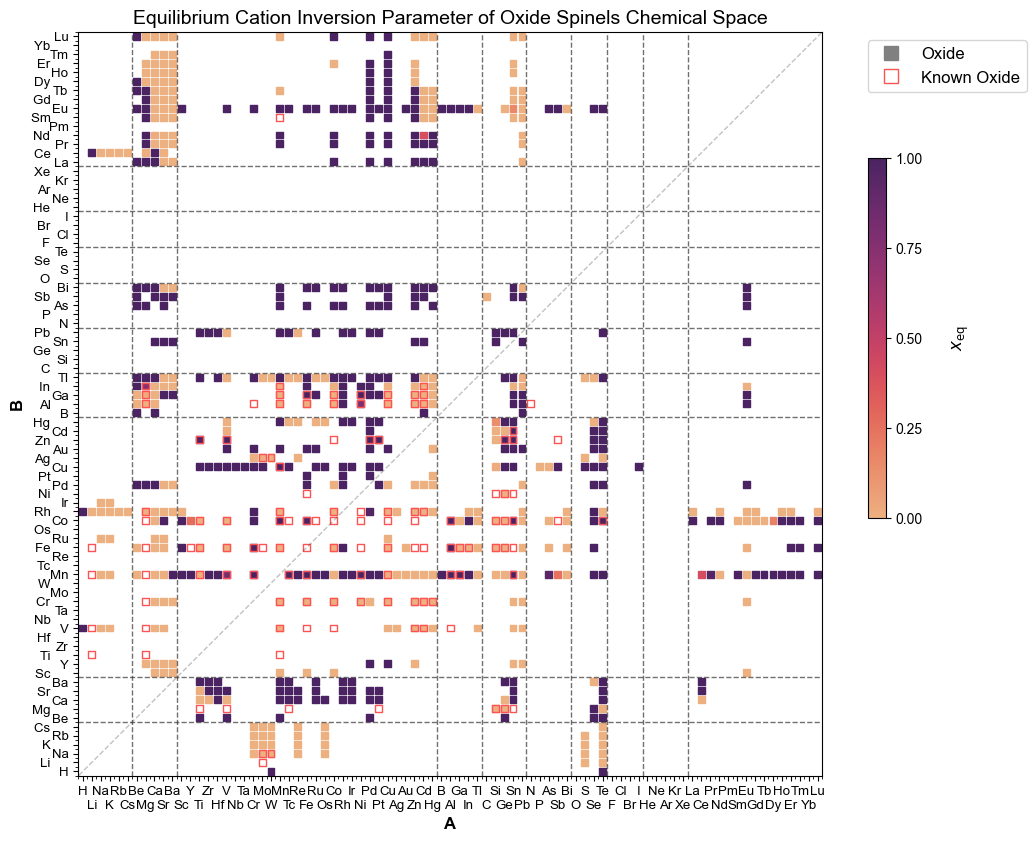

In [20]:
##SMACT valid Oxide with known data with super score

##Setting X, Y, and SuperScore data for plotting, just change the X and Y data to plot different sets
x_data = x_inv_oxide_medium
y_data = y_inv_oxide_medium
score_data = inv_param_data_oxide_medium

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

##Setting colormap
colormap = sns.color_palette("flare", as_cmap=True)

##Chemical space from SMACT with low oxidation state threshold
x_diagonal=np.linspace(-10,100,10)
y_diagonal=x_diagonal
fig,ax=plt.subplots(figsize=fig_size)
ax.set_aspect(aspect_ratio)
ax.set_xlim([-0.5,82.5])
ax.set_ylim([-0.5,82.5])
ax.plot(list_elements_by_group,list_elements_by_group,'-',linewidth=0)
ax.plot(x_diagonal,y_diagonal,'--',color=grid_color,linewidth=1,alpha=0.3)

img = ax.scatter(x_data,y_data,marker='s',s=25,c=score_data,cmap=colormap)
ax.scatter(x_exp_oxide,y_exp_oxide,marker='s',s=25,facecolor='None', edgecolor="#FE5353")

ax.set_title(f'Equilibrium Cation Inversion Parameter of {spinel_type} Spinels Chemical Space',fontsize=title_size)
ax.set_xticks(list_elements_by_group,x_label,fontsize=ticks_label_size)
ax.set_yticks(list_elements_by_group,y_label,fontsize=ticks_label_size)
ax.set_xlabel('A',fontsize=axes_label_size, fontweight='bold')
ax.set_ylabel('B',fontsize=axes_label_size, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
custom_grid = [5.5, 10.5, 39.5, 44.5, 49.5, 54.5, 58.5, 62.5, 67.5]
for x in custom_grid:
    ax.axvline(x=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
    ax.axhline(y=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
txt_pos_x=87.5
txt_pos_y=65

legend_elements = [
    Line2D([0], [0], marker='s', color='grey', markeredgecolor=None, label='Oxide', markersize=5, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markeredgecolor="#FE5353", label='Known Oxide', markersize=5, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05,1),fontsize=legend_size,markerscale=2)

##Color bar was further edited for better visualization, the final version may look slightly different
cbar = fig.colorbar(img, ax=ax, orientation='vertical',boundaries=np.linspace(0, 1,1000), ticks=np.linspace(0, 1, 5))
cbar.ax.set_position([0.783, 0.4, 1, 0.3])
cbar.set_label(r'$x_\mathrm{eq}$', fontsize=axes_label_size, labelpad=20)

fig.savefig(f'plots/5_inversion_parameter_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')

Find fraction of recovered experimentally known spinels

In [22]:
##Function to find number and percentage of experimental compounds recovered by different Ehull for SMACT low, medium and high oxidation state allowed compositions
def find_n_exp_recovered_ehull(df, ehull_thresholds):
    count_low = [0,0,0,0,0,0,0,0,0,0,0]
    count_medium = [0,0,0,0,0,0,0,0,0,0,0]
    count_high = [0,0,0,0,0,0,0,0,0,0,0]
    for i in range(len(df)):
        if df['SMACT_low'][i] == True:
            ehull_low = df['Ehull_min'][i]
            for j in range(len(ehull_thresholds)):
                if not np.isnan(ehull_low) and ehull_low <= ehull_thresholds[j] and df['Experimental'][i] == True:
                    count_low[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_medium'][i] == True:
            ehull_medium = df['Ehull_min'][i]
            for j in range(len(ehull_thresholds)):
                if not np.isnan(ehull_medium) and ehull_medium <= ehull_thresholds[j] and df['Experimental'][i] == True:
                    count_medium[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_high'][i] == True:
            ehull_high = df['Ehull_min'][i]
            for j in range(len(ehull_thresholds)):
                if not np.isnan(ehull_high) and ehull_high <= ehull_thresholds[j] and df['Experimental'][i] == True:
                    count_high[j] += 1
    df_count = pd.DataFrame({'Ehull_threshold': ehull_thresholds, 'Count_low': count_low, 'Count_medium': count_medium, 'Count_high': count_high})
    df_count['Percentage_low'] = df_count['Count_low'] / df['Experimental'].sum() * 100
    df_count['Percentage_medium'] = df_count['Count_medium'] / df['Experimental'].sum() * 100
    df_count['Percentage_high'] = df_count['Count_high'] / df['Experimental'].sum() * 100
    return df_count

##Function to find number and percentage of experimental compounds recovered by different CLscore for SMACT low, medium and high oxidation state allowed compositions
def find_n_exp_recovered_clscore(df, clscore_thresholds):
    count_low = [0,0,0,0,0,0,0,0,0,0,0]
    count_medium = [0,0,0,0,0,0,0,0,0,0,0]
    count_high = [0,0,0,0,0,0,0,0,0,0,0]
    for i in range(len(df)):
        if df['SMACT_low'][i] == True:
            clscore_low = df['CLscore'][i]
            for j in range(len(clscore_thresholds)):
                if not np.isnan(clscore_low) and clscore_low >= clscore_thresholds[j] and df['Experimental'][i] == True:
                    count_low[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_medium'][i] == True:
            clscore_medium = df['CLscore'][i]
            for j in range(len(clscore_thresholds)):
                if not np.isnan(clscore_medium) and clscore_medium >= clscore_thresholds[j] and df['Experimental'][i] == True:
                    count_medium[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_high'][i] == True:
            clscore_high = df['CLscore'][i]
            for j in range(len(clscore_thresholds)):
                if not np.isnan(clscore_high) and clscore_high >= clscore_thresholds[j] and df['Experimental'][i] == True:
                    count_high[j] += 1
    df_count = pd.DataFrame({'CLscore_threshold': clscore_thresholds, 'Count_low': count_low, 'Count_medium': count_medium, 'Count_high': count_high})
    df_count['Percentage_low'] = df_count['Count_low'] / df['Experimental'].sum() * 100
    df_count['Percentage_medium'] = df_count['Count_medium'] / df['Experimental'].sum() * 100
    df_count['Percentage_high'] = df_count['Count_high'] / df['Experimental'].sum() * 100
    return df_count

##Function to find number and percentage of experimental compounds recovered by different Super score for SMACT low, medium and high oxidation state allowed compositions
def find_n_exp_recovered_superscore(df, superscore_thresholds):
    count_low = [0,0,0,0,0,0,0,0,0,0,0]
    count_medium = [0,0,0,0,0,0,0,0,0,0,0]
    count_high = [0,0,0,0,0,0,0,0,0,0,0]
    for i in range(len(df)):
        if df['SMACT_low'][i] == True:
            superscore_low = df['SuperScore'][i]
            for j in range(len(superscore_thresholds)):
                if not np.isnan(superscore_low) and superscore_low >= superscore_thresholds[j] and df['Experimental'][i] == True:
                    count_low[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_medium'][i] == True:
            superscore_medium = df['SuperScore'][i]
            for j in range(len(superscore_thresholds)):
                if not np.isnan(superscore_medium) and superscore_medium >= superscore_thresholds[j] and df['Experimental'][i] == True:
                    count_medium[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_high'][i] == True:
            superscore_high = df['SuperScore'][i]
            for j in range(len(superscore_thresholds)):
                if not np.isnan(superscore_high) and superscore_high >= superscore_thresholds[j] and df['Experimental'][i] == True:
                    count_high[j] += 1
    df_count = pd.DataFrame({'SuperScore_threshold': superscore_thresholds, 'Count_low': count_low, 'Count_medium': count_medium, 'Count_high': count_high})
    df_count['Percentage_low'] = df_count['Count_low'] / df['Experimental'].sum() * 100
    df_count['Percentage_medium'] = df_count['Count_medium'] / df['Experimental'].sum() * 100
    df_count['Percentage_high'] = df_count['Count_high'] / df['Experimental'].sum() * 100
    return df_count

In [23]:
ehull_thresholds_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df_exp_recovered_oxide_ehull = find_n_exp_recovered_ehull(df_oxide_all, ehull_thresholds_list)
df_exp_recovered_sulfide_ehull = find_n_exp_recovered_ehull(df_sulfide_all, ehull_thresholds_list)
df_exp_recovered_selenide_ehull = find_n_exp_recovered_ehull(df_selenide_all, ehull_thresholds_list)
df_exp_recovered_telluride_ehull = find_n_exp_recovered_ehull(df_telluride_all, ehull_thresholds_list)

pul_thresholds_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df_exp_recovered_oxide_clscore = find_n_exp_recovered_clscore(df_oxide_all, pul_thresholds_list)
df_exp_recovered_sulfide_clscore = find_n_exp_recovered_clscore(df_sulfide_all, pul_thresholds_list)
df_exp_recovered_selenide_clscore = find_n_exp_recovered_clscore(df_selenide_all, pul_thresholds_list)
df_exp_recovered_telluride_clscore = find_n_exp_recovered_clscore(df_telluride_all, pul_thresholds_list)

super_score_thresholds_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df_exp_recovered_oxide_superscore = find_n_exp_recovered_superscore(df_oxide_all, super_score_thresholds_list)
df_exp_recovered_sulfide_superscore = find_n_exp_recovered_superscore(df_sulfide_all, super_score_thresholds_list)
df_exp_recovered_selenide_superscore = find_n_exp_recovered_superscore(df_selenide_all, super_score_thresholds_list)
df_exp_recovered_telluride_superscore = find_n_exp_recovered_superscore(df_telluride_all, super_score_thresholds_list)

In [24]:
df_exp_recovered_oxide_ehull

,Ehull_threshold,Count_low,Count_medium,Count_high,Percentage_low,Percentage_medium,Percentage_high
0,0.0,5,5,5,4.032258,4.032258,4.032258
1,0.1,83,80,52,66.935484,64.516129,41.935484
2,0.2,109,103,61,87.903226,83.064516,49.193548
3,0.3,119,111,63,95.967742,89.516129,50.806452
4,0.4,123,114,65,99.193548,91.935484,52.419355
5,0.5,123,114,65,99.193548,91.935484,52.419355
6,0.6,123,114,65,99.193548,91.935484,52.419355
7,0.7,123,114,65,99.193548,91.935484,52.419355
8,0.8,123,114,65,99.193548,91.935484,52.419355
9,0.9,123,114,65,99.193548,91.935484,52.419355


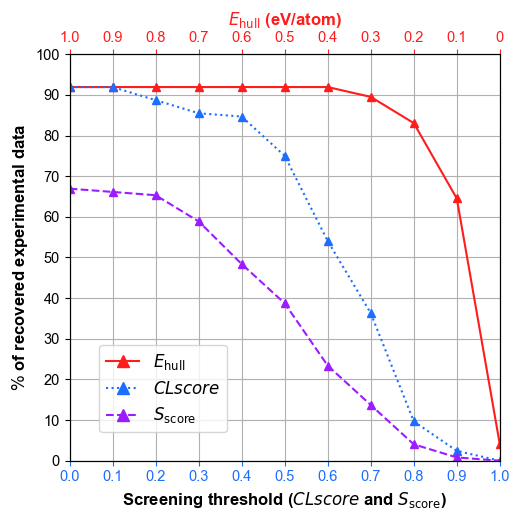

In [25]:
##Plotting the fraction of experimental compounds recovered by different Ehull, CLscore and Super score for SMACT medium oxidation state allowed oxide spinels
##This was further modified in PowerPoint for better visualization, so the final version may look slightly different

##Setting X, Y, and SuperScore data for plotting, just change the X and Y data to plot different sets
smact_oxi_threshold_type_list = ['Percentage_low', 'Percentage_medium', 'Percentage_high']
smact_oxi_threshold_type = smact_oxi_threshold_type_list[1] #Change this according to the oxidation state threshold

ehull_data = df_exp_recovered_oxide_ehull[smact_oxi_threshold_type]
clscore_data = df_exp_recovered_oxide_clscore[smact_oxi_threshold_type]
superscore_data = df_exp_recovered_oxide_superscore[smact_oxi_threshold_type],

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

# Data
thresholds_ehull = ehull_thresholds_list[::-1]
thresholds_pul = pul_thresholds_list
thresholds_super = super_score_thresholds_list

# Marker styles
colors = {
    'ehull': '#FF1C1C',
    'clscore': '#1C6EFF',
    'superscore': '#9D1CFF'
}

fig, ax = plt.subplots(figsize=(5.3, 5.3))

# Plot lines
ax.plot(thresholds_ehull, df_exp_recovered_oxide_ehull['Percentage_medium'], marker='^', linestyle='-', linewidth=1.5, color=colors['ehull'], label=r'$E_\mathrm{hull}$')
ax.plot(thresholds_pul, df_exp_recovered_oxide_clscore['Percentage_medium'], marker='^', linestyle=':', linewidth=1.5, color=colors['clscore'], label=r'$CLscore$')
ax.plot(thresholds_super, df_exp_recovered_oxide_superscore['Percentage_medium'], marker='^', linestyle='--', linewidth=1.5, color=colors['superscore'], label=r'$S_\mathrm{score}$')

# Axis settings
ax.set_xticks(thresholds_pul)
ax.set_xlim(min(thresholds_pul), max(thresholds_pul))
ax.set_xlabel(r'Screening threshold ($CLscore$ and $S_\mathrm{score}$)', fontsize=axes_label_size, fontweight='bold', color='black')  # label color
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylim(0, 100)
ax.set_ylabel(r'$\%$ of recovered experimental data', fontsize=axes_label_size, fontweight='bold')
ax.tick_params(axis='x', colors=colors['clscore'])  # x-tick labels and marks in blue
# ax.spines['bottom'].set_color('blue')   # x-axis line in blue
ax.tick_params(axis='both', labelsize=10.5)

# Top x-axis
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())  # Match base axis limits
ax_top.set_xticks(thresholds_pul)
ax_top.set_xticklabels(thresholds_ehull)
ax_top.set_xlabel(r'$E_\mathrm{hull}$ (eV/atom)', fontsize=axes_label_size, fontweight='bold', color=colors['ehull'])  # label color
ax_top.tick_params(axis='x', colors=colors['ehull'])  # x-tick labels and marks in red
# ax_top.spines['top'].set_color('red')      # x-axis line in red
ax_top.tick_params(axis='both', labelsize=10.5)

# Legend and grid
ax.legend(loc='lower left', bbox_to_anchor=(0.05, 0.05), fontsize=legend_size, markerscale=1.5)
ax.grid(True)

plt.tight_layout()
plt.savefig(f'plots/6_fraction_of_recovered_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')
plt.show()


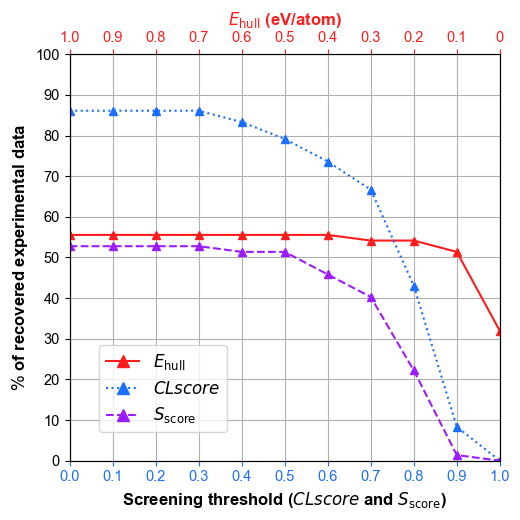

In [26]:
##Plotting the fraction of experimental compounds recovered by different Ehull, CLscore and Super score for SMACT medium oxidation state allowed oxide spinels
##This was further modified in PowerPoint for better visualization, so the final version may look slightly different

##Setting X, Y, and SuperScore data for plotting, just change the X and Y data to plot different sets
smact_oxi_threshold_type_list = ['Percentage_low', 'Percentage_medium', 'Percentage_high']
smact_oxi_threshold_type = smact_oxi_threshold_type_list[1] #Change this according to the oxidation state threshold

ehull_data = df_exp_recovered_sulfide_ehull[smact_oxi_threshold_type]
clscore_data = df_exp_recovered_sulfide_clscore[smact_oxi_threshold_type]
superscore_data = df_exp_recovered_sulfide_superscore[smact_oxi_threshold_type],

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[1] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

# Data
thresholds_ehull = ehull_thresholds_list[::-1]
thresholds_pul = pul_thresholds_list
thresholds_super = super_score_thresholds_list

# Marker styles
colors = {
    'ehull': '#FF1C1C',
    'clscore': '#1C6EFF',
    'superscore': '#9D1CFF'
}

fig, ax = plt.subplots(figsize=(5.3, 5.3))

# Plot lines
ax.plot(thresholds_ehull, df_exp_recovered_sulfide_ehull['Percentage_medium'], marker='^', linestyle='-', linewidth=1.5, color=colors['ehull'], label=r'$E_\mathrm{hull}$')
ax.plot(thresholds_pul, df_exp_recovered_sulfide_clscore['Percentage_medium'], marker='^', linestyle=':', linewidth=1.5, color=colors['clscore'], label=r'$CLscore$')
ax.plot(thresholds_super, df_exp_recovered_sulfide_superscore['Percentage_medium'], marker='^', linestyle='--', linewidth=1.5, color=colors['superscore'], label=r'$S_\mathrm{score}$')

# Axis settings
ax.set_xticks(thresholds_pul)
ax.set_xlim(min(thresholds_pul), max(thresholds_pul))
ax.set_xlabel(r'Screening threshold ($CLscore$ and $S_\mathrm{score}$)', fontsize=axes_label_size, fontweight='bold', color='black')  # label color
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylim(0, 100)
ax.set_ylabel(r'$\%$ of recovered experimental data', fontsize=axes_label_size, fontweight='bold')
ax.tick_params(axis='x', colors=colors['clscore'])  # x-tick labels and marks in blue
# ax.spines['bottom'].set_color('blue')   # x-axis line in blue
ax.tick_params(axis='both', labelsize=10.5)

# Top x-axis
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())  # Match base axis limits
ax_top.set_xticks(thresholds_pul)
ax_top.set_xticklabels(thresholds_ehull)
ax_top.set_xlabel(r'$E_\mathrm{hull}$ (eV/atom)', fontsize=axes_label_size, fontweight='bold', color=colors['ehull'])  # label color
ax_top.tick_params(axis='x', colors=colors['ehull'])  # x-tick labels and marks in red
# ax_top.spines['top'].set_color('red')      # x-axis line in red
ax_top.tick_params(axis='both', labelsize=10.5)

# Legend and grid
ax.legend(loc='lower left', bbox_to_anchor=(0.05, 0.05), fontsize=legend_size, markerscale=1.5)
ax.grid(True)

plt.tight_layout()
plt.savefig(f'plots/6_fraction_of_recovered_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')
plt.show()

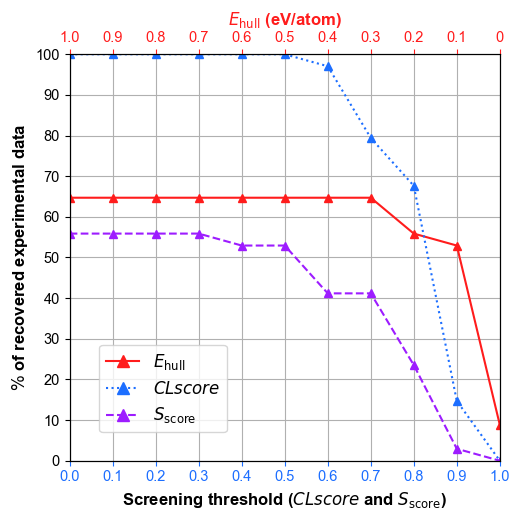

In [27]:
##Plotting the fraction of experimental compounds recovered by different Ehull, CLscore and Super score for SMACT medium oxidation state allowed oxide spinels
##This was further modified in PowerPoint for better visualization, so the final version may look slightly different

##Setting X, Y, and SuperScore data for plotting, just change the X and Y data to plot different sets
smact_oxi_threshold_type_list = ['Percentage_low', 'Percentage_medium', 'Percentage_high']
smact_oxi_threshold_type = smact_oxi_threshold_type_list[1] #Change this according to the oxidation state threshold

ehull_data = df_exp_recovered_selenide_ehull[smact_oxi_threshold_type]
clscore_data = df_exp_recovered_selenide_clscore[smact_oxi_threshold_type]
superscore_data = df_exp_recovered_selenide_superscore[smact_oxi_threshold_type],

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[2] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

# Data
thresholds_ehull = ehull_thresholds_list[::-1]
thresholds_pul = pul_thresholds_list
thresholds_super = super_score_thresholds_list

# Marker styles
colors = {
    'ehull': '#FF1C1C',
    'clscore': '#1C6EFF',
    'superscore': '#9D1CFF'
}

fig, ax = plt.subplots(figsize=(5.3, 5.3))

# Plot lines
ax.plot(thresholds_ehull, df_exp_recovered_selenide_ehull['Percentage_medium'], marker='^', linestyle='-', linewidth=1.5, color=colors['ehull'], label=r'$E_\mathrm{hull}$')
ax.plot(thresholds_pul, df_exp_recovered_selenide_clscore['Percentage_medium'], marker='^', linestyle=':', linewidth=1.5, color=colors['clscore'], label=r'$CLscore$')
ax.plot(thresholds_super, df_exp_recovered_selenide_superscore['Percentage_medium'], marker='^', linestyle='--', linewidth=1.5, color=colors['superscore'], label=r'$S_\mathrm{score}$')

# Axis settings
ax.set_xticks(thresholds_pul)
ax.set_xlim(min(thresholds_pul), max(thresholds_pul))
ax.set_xlabel(r'Screening threshold ($CLscore$ and $S_\mathrm{score}$)', fontsize=axes_label_size, fontweight='bold', color='black')  # label color
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylim(0, 100)
ax.set_ylabel(r'$\%$ of recovered experimental data', fontsize=axes_label_size, fontweight='bold')
ax.tick_params(axis='x', colors=colors['clscore'])  # x-tick labels and marks in blue
# ax.spines['bottom'].set_color('blue')   # x-axis line in blue
ax.tick_params(axis='both', labelsize=10.5)

# Top x-axis
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())  # Match base axis limits
ax_top.set_xticks(thresholds_pul)
ax_top.set_xticklabels(thresholds_ehull)
ax_top.set_xlabel(r'$E_\mathrm{hull}$ (eV/atom)', fontsize=axes_label_size, fontweight='bold', color=colors['ehull'])  # label color
ax_top.tick_params(axis='x', colors=colors['ehull'])  # x-tick labels and marks in red
# ax_top.spines['top'].set_color('red')      # x-axis line in red
ax_top.tick_params(axis='both', labelsize=10.5)

# Legend and grid
ax.legend(loc='lower left', bbox_to_anchor=(0.05, 0.05), fontsize=legend_size, markerscale=1.5)
ax.grid(True)

plt.tight_layout()
plt.savefig(f'plots/6_fraction_of_recovered_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')
plt.show()

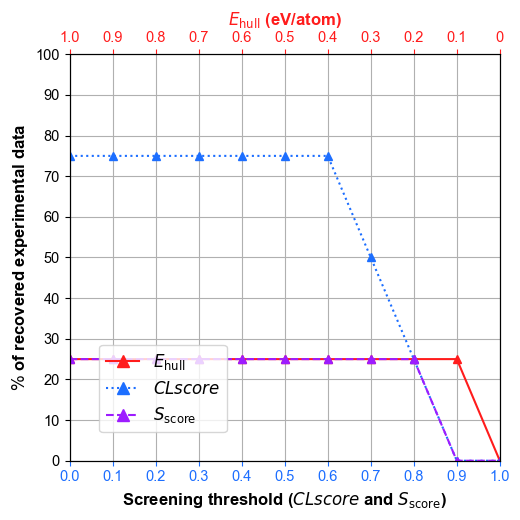

In [28]:
##Plotting the fraction of experimental compounds recovered by different Ehull, CLscore and Super score for SMACT medium oxidation state allowed oxide spinels
##This was further modified in PowerPoint for better visualization, so the final version may look slightly different

##Setting X, Y, and SuperScore data for plotting, just change the X and Y data to plot different sets
smact_oxi_threshold_type_list = ['Percentage_low', 'Percentage_medium', 'Percentage_high']
smact_oxi_threshold_type = smact_oxi_threshold_type_list[1] #Change this according to the oxidation state threshold

ehull_data = df_exp_recovered_telluride_ehull[smact_oxi_threshold_type]
clscore_data = df_exp_recovered_telluride_clscore[smact_oxi_threshold_type]
superscore_data = df_exp_recovered_telluride_superscore[smact_oxi_threshold_type],

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[3] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

# Data
thresholds_ehull = ehull_thresholds_list[::-1]
thresholds_pul = pul_thresholds_list
thresholds_super = super_score_thresholds_list

# Marker styles
colors = {
    'ehull': '#FF1C1C',
    'clscore': '#1C6EFF',
    'superscore': '#9D1CFF'
}

fig, ax = plt.subplots(figsize=(5.3, 5.3))

# Plot lines
ax.plot(thresholds_ehull, df_exp_recovered_telluride_ehull['Percentage_medium'], marker='^', linestyle='-', linewidth=1.5, color=colors['ehull'], label=r'$E_\mathrm{hull}$')
ax.plot(thresholds_pul, df_exp_recovered_telluride_clscore['Percentage_medium'], marker='^', linestyle=':', linewidth=1.5, color=colors['clscore'], label=r'$CLscore$')
ax.plot(thresholds_super, df_exp_recovered_telluride_superscore['Percentage_medium'], marker='^', linestyle='--', linewidth=1.5, color=colors['superscore'], label=r'$S_\mathrm{score}$')

# Axis settings
ax.set_xticks(thresholds_pul)
ax.set_xlim(min(thresholds_pul), max(thresholds_pul))
ax.set_xlabel(r'Screening threshold ($CLscore$ and $S_\mathrm{score}$)', fontsize=axes_label_size, fontweight='bold', color='black')  # label color
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylim(0, 100)
ax.set_ylabel(r'$\%$ of recovered experimental data', fontsize=axes_label_size, fontweight='bold')
ax.tick_params(axis='x', colors=colors['clscore'])  # x-tick labels and marks in blue
# ax.spines['bottom'].set_color('blue')   # x-axis line in blue
ax.tick_params(axis='both', labelsize=10.5)

# Top x-axis
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())  # Match base axis limits
ax_top.set_xticks(thresholds_pul)
ax_top.set_xticklabels(thresholds_ehull)
ax_top.set_xlabel(r'$E_\mathrm{hull}$ (eV/atom)', fontsize=axes_label_size, fontweight='bold', color=colors['ehull'])  # label color
ax_top.tick_params(axis='x', colors=colors['ehull'])  # x-tick labels and marks in red
# ax_top.spines['top'].set_color('red')      # x-axis line in red
ax_top.tick_params(axis='both', labelsize=10.5)

# Legend and grid
ax.legend(loc='lower left', bbox_to_anchor=(0.05, 0.05), fontsize=legend_size, markerscale=1.5)
ax.grid(True)

plt.tight_layout()
plt.savefig(f'plots/6_fraction_of_recovered_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')
plt.show()